In [109]:
import numpy as np
import matplotlib.pyplot as plt
import stats
from iminuit import Minuit
from iminuit.cost import ExtendedUnbinnedNLL,UnbinnedNLL

In [102]:
def f(x,p_0=2,p_1=3):
    x = np.array(x)
    return (np.power((x-p_0),3) + p_1)

In [103]:
x = [0.5, 1.5, 2.5, 3.5]
y = f(x)
print(type(y), y.shape, y)

<class 'numpy.ndarray'> (4,) [-0.375  2.875  3.125  6.375]


In [104]:
def gen_data(x,mu=0,sigma=1):
    return np.array([f(i) + stats.normal(mu,sigma) for i in x])

<h2>Grafico Dati

<class 'numpy.ndarray'> (4,) [-0.22656979  2.69846188  2.95927009  6.33569951]


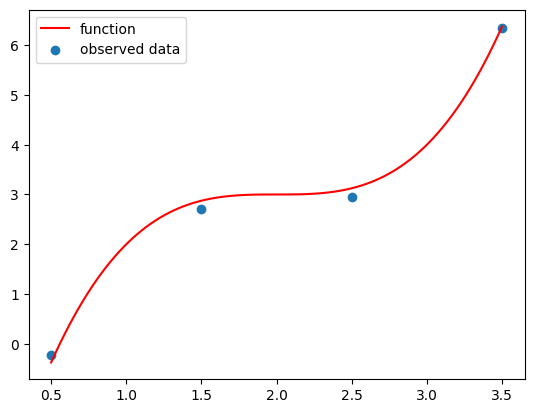

In [107]:
x = np.linspace(0.5,3.5,100)
y = gen_data(x,0,0)
plt.plot(x,y, c = 'r')

x = [0.5, 1.5, 2.5, 3.5]
y = gen_data(x,mu=0,sigma=0.2)
plt.scatter(x,y)

plt.legend(['function','observed data'])

plt.show()

<h2>Fit

In [114]:
cost = UnbinnedNLL(y,f)
my_minuit = Minuit(cost, p_0=2, p_1=3)
my_minuit.migrad()
my_minuit.hesse()
display(my_minuit)

┌─────────────────────────────────────────────────────────────────────────┐
│                                Migrad                                   │
├──────────────────────────────────┬──────────────────────────────────────┤
│ FCN = -2107                      │              Nfcn = 434              │
│ EDM = 0.000448 (Goal: 0.0002)    │                                      │
├──────────────────────────────────┼──────────────────────────────────────┤
│         INVALID Minimum          │   Below EDM threshold (goal x 10)    │
├──────────────────────────────────┼──────────────────────────────────────┤
│      No parameters at limit      │           Below call limit           │
├──────────────────────────────────┼──────────────────────────────────────┤
│           Hesse FAILED           │       Covariance NOT pos. def.       │
└──────────────────────────────────┴──────────────────────────────────────┘
┌───┬──────┬───────────┬───────────┬────────────┬────────────┬─────────┬─────────┬───────┐
│   │ Name │   Value   │ Hesse Err │ Minos Err- │ Minos Err+ │ Limit-  │ Limit+  │ Fixed │
├───┼──────┼───────────┼───────────┼────────────┼────────────┼─────────┼─────────┼───────┤
│ 0 │ p_0  │-1.3372e38 │ 0.0000e38 │            │            │         │         │       │
│ 1 │ p_1  │ 2.5134e40 │ 0.0000e40 │            │            │         │         │       │
└───┴──────┴───────────┴───────────┴────────────┴────────────┴─────────┴─────────┴───────┘